In [97]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
import os


class MovieDiary():
    
    """ A class to keep track of movies watched, 
    including location and an evaluation of the movie.
    
    Attributes: 
        diary: pandas dataframe that can be filled with different movies.""" 
    
    def __init__(self):
        
        self.diary = pd.DataFrame(columns = ['date', 
                                             'movie', 
                                             'Where', 
                                             'Category', 
                                             'Evaluation'])
        
    def add_movie(self, movie, where, category, evaluation):
        
        """Function to read a new movie and create a new
        dataframe and a CSV with this movie. If this file already
        exists, the movie is appended.
        
        For now, the date column is always "today".
        
        Args:
            movie (string): The movie the user watched.
            where (string): The location where the movie was watched.
            category (string): The category of the movie watched, e.g. cinema, netflix. 
            evaluation (int): The evaluation the user gives the movie.
            
        Returns:
            The updated dataframe with the new movie
            The csv file my_movie_diary.csv
        
        """
        
        try:
            self.diary = pd.read_csv('my_movie_diary.csv', index_col=0)
        
            new_entry = {'date': date.today(), 
                         'movie': movie,
                         'Where': where,
                         'Category': category,
                         'Evaluation': evaluation}
        
            self.diary = self.diary.append(new_entry, ignore_index = True)
        
            self.diary.to_csv('my_movie_diary.csv')
        
        except FileNotFoundError:
            new_entry = {'date': date.today(), 
                         'movie': movie,
                         'Where': where,
                         'Category': category,
                         'Evaluation': evaluation}
        
            self.diary = self.diary.append(new_entry, ignore_index = True)
        
            self.diary.to_csv('my_movie_diary.csv')
        
        return self.diary
    
    def delete_diary(self):
        
        """A function to delete the existing csv file that stores the diary."""
        
        try:
            os.remove('my_movie_diary.csv')
        
        except FileNotFoundError:
            print('There is no diary to delete left, you berserker.')
    
    def plot_top_movies_time(self):
        
        """A function to plot the views of the 30 most viewed movies over time, 
        including the category and evaluation of the movie.
        
        Args:
            none
            
        Returns:
            Seaborn scatterplot"""
        
        try:
            movie_diary = pd.read_csv('my_movie_diary.csv', index_col=0)
            top_movies_list = movie_diary.groupby('movie').date.count().reset_index().sort_values('date', 
                                                                ascending = False).iloc[:30]['movie']
            
            movie_diary_top_movies = pd.merge(movie_diary, top_movies_list, on = 'movie', how='inner')
            
            
            f, ax = plt.subplots(figsize = (20, 10))
            sns.scatterplot(movie_diary_top_movies.date, 
                            movie_diary_top_movies.movie, 
                            hue = movie_diary_top_movies.Category,
                            size = movie_diary_top_movies.Evaluation,
                            sizes = (100, 800),
                            alpha = 0.7)
            
            plt.title('Timeline of most watched movies',fontsize=20)
            plt.xlabel('Date',fontsize=20)
            plt.ylabel('Most watched movies',fontsize=20)
            plt.tick_params(labelsize=20)
            plt.legend(loc=2, fontsize=20)
            plt.grid(False)
            ax.yaxis.grid()
            plt.show()
            
        except FileNotFoundError:
            print('Looks like you don\'t have a diary yet. Watch more movies.')
            
            
        
    
    

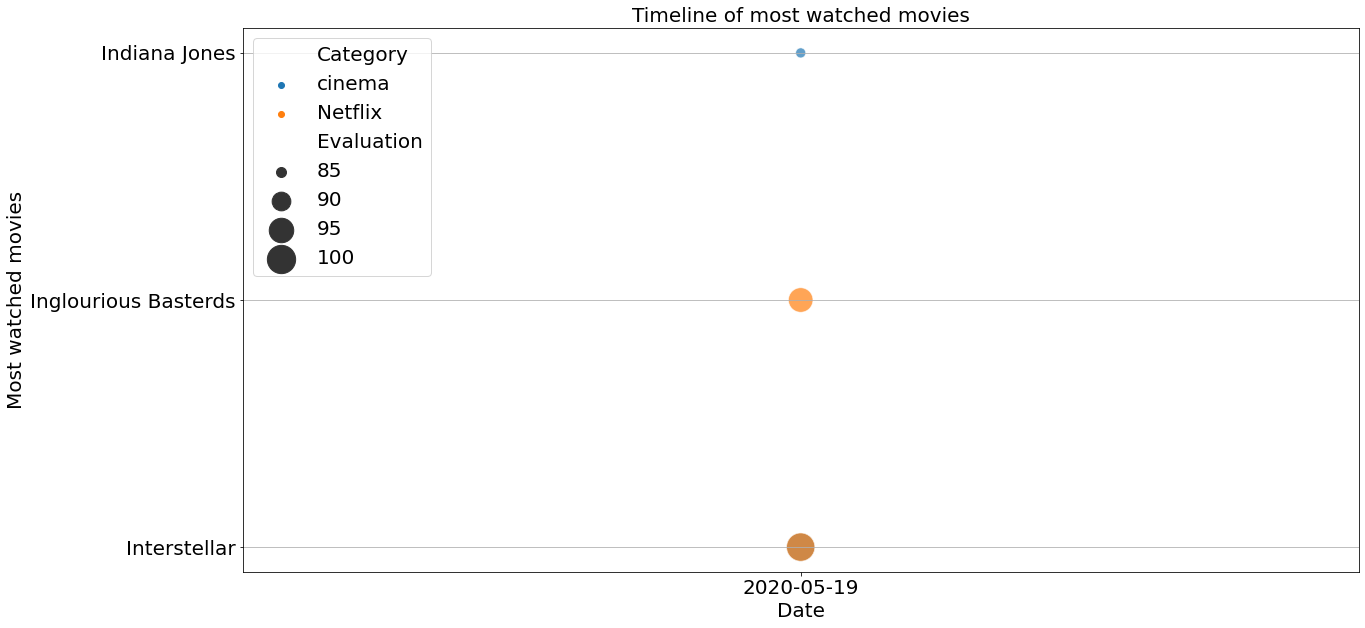

In [98]:
my_diary = MovieDiary()
my_diary.plot_top_movies_time()

In [64]:
my_diary = MovieDiary()

#df = my_diary.add_movie('Interstellar', 'Rodenberger', 'cinema', 99)
#df = my_diary.add_movie('Inglourious Basterds', 'Marienburger', 'Netflix', 95)
#df = my_diary.add_movie('Indiana Jones', 'Cinestar', 'cinema', 85)
#df = my_diary.add_movie('Interstellar', 'Rodenberger', 'Netflix', 99)
df
#my_diary.delete_diary()

my_diary.plot_top_movies_time()

,date,movie,Where,Category,Evaluation
0,2020-05-19,Interstellar,Rodenberger,cinema,99
1,2020-05-19,Interstellar,Rodenberger,Netflix,99
2,2020-05-19,Inglourious Basterds,Marienburger,Netflix,95
3,2020-05-19,Indiana Jones,Cinestar,cinema,85
